In [1]:
from core import *
import warnings
warnings.filterwarnings('ignore')
import biotite.sequence as seq


In [2]:
cell_path1 = './lr/after/datas/tree3.h5ad' #path for single-cell data1
folder_path1 = './lr/after/datas/t3/'    #folder to save the results
radius1 = 0 # parameter for converting into meta cell

cell_path2 = './lr/after/datas/all_b/all_b.h5ad' #path for single-cell data2
folder_path2 = './lr/after/datas/all_b/'  
radius2 = 0

resolution=1 #parameter for clustering
method='average' # method we calcuclate the center value 
 
learning_rate = 0.0005
n_pca = 20 #pca number
meta_col= 'celltype' #celltype col in the single-cell file
epoches11 = 10 #number for embedding
epoches21 = 2 #number for rotation

# epoches12 = 15 #number for embedding
# epoches22 = 2 #number for rotation

c1=10 # threshold for merging
c2=10  # threshold for merging

In [3]:
merge_by_radius(cell_path1,folder_path1,radius1,method,meta_col)

100%|██████████████████████████████████████| 140/140 [00:00<00:00, 84745.64it/s]


In [4]:
adata1 = sc.read_h5ad(folder_path1+ 'adata.h5ad')


In [5]:
# adata1.obs['leiden']=adata1.obs['celltype']
# adata1.obs

In [6]:
adata1

AnnData object with n_obs × n_vars = 140 × 2000
    obs: 'celltype'

In [7]:
# adata1.obs['leiden']=adata1.obs['celltype']
# meta_list1 = ['0','1','2','3','4']

In [8]:
preprocessing_cluster(adata1,N_pcs=n_pca,resolution=resolution)


2024-11-13 00:12:29.632403: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# inter_gene = sort_data(adata1,adata1)
inter_gene = adata1.var.index.tolist()
adata1.obsm['X'] = adata1.X
tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1,X_dimension='X')
meta_list1 = calculate_cluster_celltype(adata1,meta_col='leiden');
meta_list1

['0', '1', '2', '3', '4', '5', '6']

In [10]:
# # preprocessing_cluster(adata1,N_pcs=n_pca,resolution=resolution)
# inter_gene = sort_data(adata1,adata1)
# tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1)
# meta_list1 = calculate_cluster_celltype(adata1);
# meta_list1

In [11]:
adata1.obs.groupby('leiden').describe()

celltype                
          count unique top freq
leiden                         
0            20      1   2   20
1            20      1   6   20
2            20      1   1   20
3            20      1   4   20
4            20      1   5   20
5            20      1   0   20
6            20      1   3   20

./lr/after/datas/t3/datas.data length:7
Generating all pairs superset
	 Epoch 0 | average train loss: 0.491315
Dasgupta's cost:	45.3325
Optimization finished.
	 Epoch 1 | average train loss: 0.430023
Dasgupta's cost:	45.1295
Optimization finished.
	 Epoch 2 | average train loss: 0.426448
Dasgupta's cost:	44.6487
Optimization finished.
	 Epoch 3 | average train loss: 0.425593
Dasgupta's cost:	44.5330
Optimization finished.
	 Epoch 4 | average train loss: 0.427958
Dasgupta's cost:	44.6487
Optimization finished.
	 Epoch 5 | average train loss: 0.424963
Dasgupta's cost:	44.4580
Optimization finished.
	 Epoch 6 | average train loss: 0.431392
Dasgupta's cost:	44.5418
Optimization finished.
	 Epoch 7 | average train loss: 0.428960
Dasgupta's cost:	44.4580
Optimization finished.
	 Epoch 8 | average train loss: 0.429948
Dasgupta's cost:	44.4580
Optimization finished.
	 Epoch 9 | average train loss: 0.430660
Dasgupta's cost:	44.4580
Optimization finished.
---
0 best_cost: 44.45797846497411
---
	

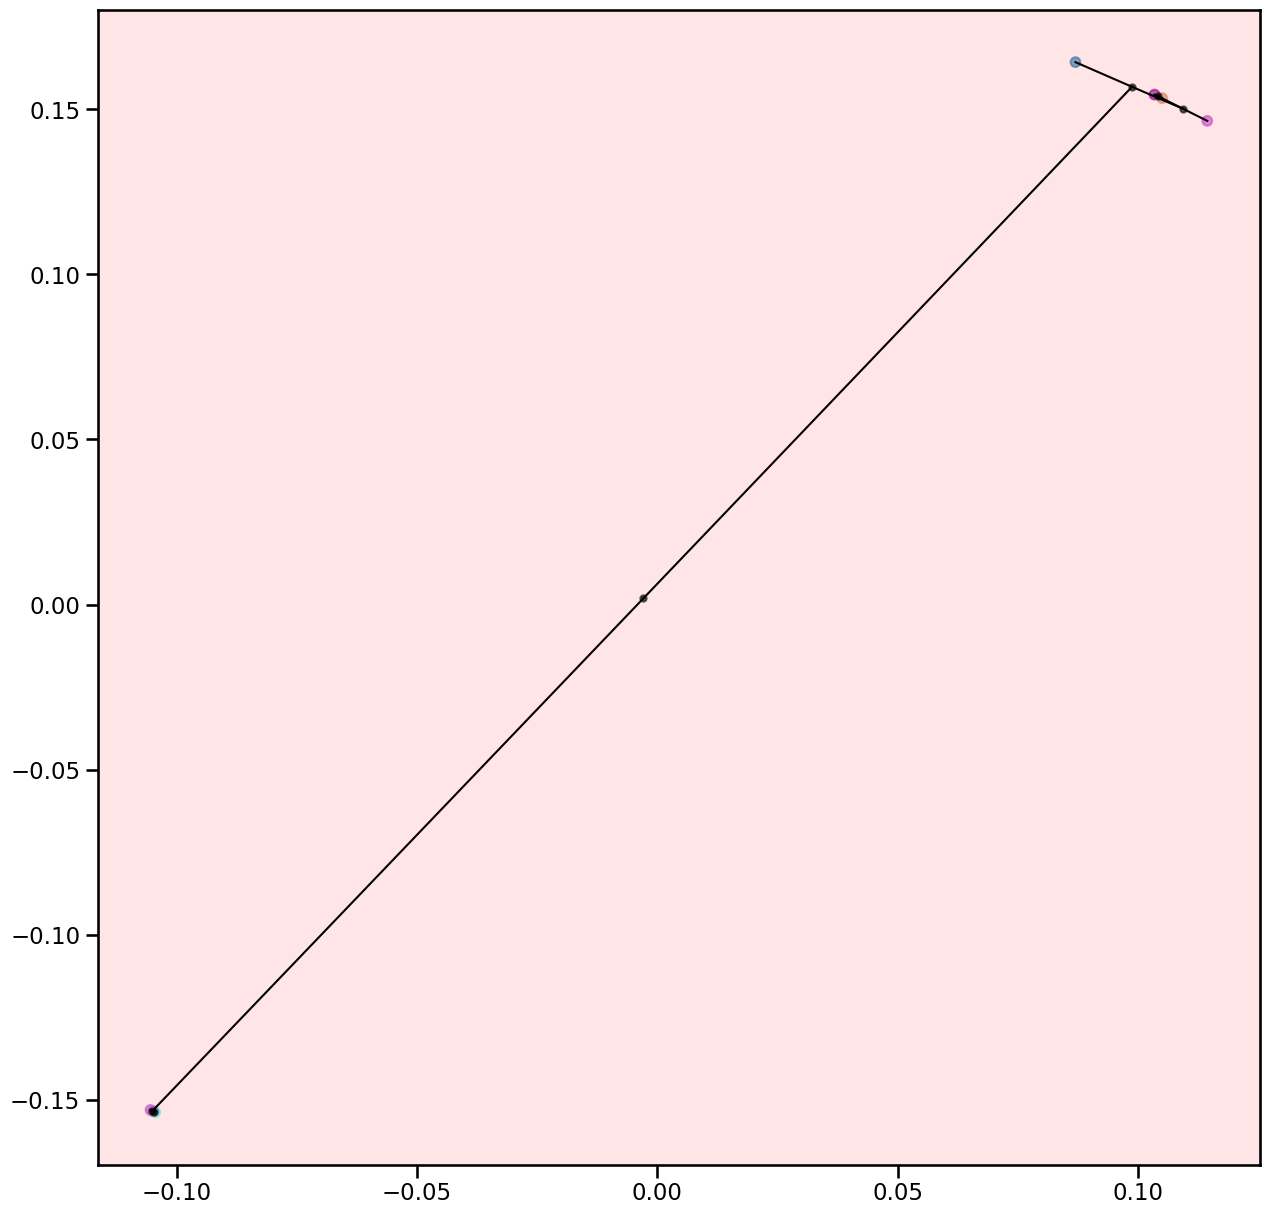

In [12]:
embeddings1,nodes1 = get_Hyper_tree(folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,epoches11,0,meta_list1,save_path=folder_path1,learning_rate = learning_rate,multi = 5)

In [13]:
merge_points_with_c(embeddings1,nodes1,folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,folder_path1,epoches21,c1,-1)
nos1 = build_hyper_tree_from_folder(folder_path1,True)
add_meta(nos1[0],meta_list1,[])
show_tree(nos1[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(nos1[0]);

True
{'1': '#184e77', '3': '#1a759f', '4': '#168aad', '5': '#34a0a4', 'empty': '#fff', '2': '#99d98c', '6': '#76c893', '0': '#99d98c'}


In [14]:
# merge_points_with_c(embeddings1,nodes1,folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,folder_path1,epoches21,1,1)
# nos1 = build_hyper_tree_from_folder(folder_path1,True)
# add_meta(nos1[0],meta_list1,[])
# show_tree(nos1[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
# remove_meta(nos1[0]);

        0                       0
   1        2               1       2
  3 4                       4       0
                            3

In [16]:
X = np.array([[1.9995527864, 1.7542556889, 0.9892064807, 1.6836552229,
        0.9895102962, 1.6515763829, 0.9893444771],
       [1.7542556889, 1.9995527864, 0.9878904861, 1.7995472835,
        0.987994611 , 1.7513944807, 0.9879354206],
       [0.9892064807, 0.9878904861, 1.9995527864, 0.9877819725,
        1.9065111633, 0.9879779436, 1.9361627998],
       [1.6836552229, 1.7995472835, 0.9877819725, 1.9995527864,
        0.9877536629, 1.8523854376, 0.9877651837],
       [0.9895102962, 0.987994611 , 1.9065111633, 0.9877536629,
        1.9995527864, 0.987877933 , 1.9316757064],
       [1.6515763829, 1.7513944807, 0.9879779436, 1.8523854376,
        0.987877933 , 1.9995527864, 0.9879277357],
       [0.9893444771, 0.9879354206, 1.9361627998, 0.9877651837,
        1.9316757064, 0.9879277357, 1.9995527864]])

In [17]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X, 
                              n_components=4,
                              n_iter=5,
                              random_state=None)
U, Sigma, Vt = np.linalg.svd(X)
sig = np.zeros((len(Sigma),len(Sigma)))
for i in range(len(Sigma)):
    sig[i][i] = (Sigma**0.5)[i]
W=np.matmul(U,sig)


In [18]:
U, Sigma, Vt = np.linalg.svd(X)
sig = np.zeros((len(Sigma),len(Sigma)))
for i in range(len(Sigma)):
    sig[i][i] = (Sigma**0.5)[i]
W=np.matmul(U,sig)


In [19]:
from sklearn.decomposition import NMF
model = NMF(n_components=7, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_


In [29]:
x

array([[0.7817198163, 0.0053374972, 0.183714396 , 0.0910215768,
        0.5826622047, 0.          , 0.0857583135],
       [0.6487596938, 0.          , 0.0533956962, 0.3145653865,
        0.5981246479, 0.339644839 , 0.0647816783],
       [0.5913634189, 0.4692680486, 0.4993232949, 0.0206970727,
        0.0635569116, 0.4128711635, 0.0763059957],
       [0.730172915 , 0.0514037588, 0.1893905793, 0.4258748013,
        0.4548138379, 0.0185453139, 0.1994178377],
       [0.52308231  , 0.51943366  , 0.4827633789, 0.0245407369,
        0.0068524824, 0.2412364032, 0.405794139 ],
       [0.5703066719, 0.1334514243, 0.3265227502, 0.4510964652,
        0.5883121366, 0.0269206249, 0.          ],
       [0.5449686462, 0.4811104163, 0.5172437781, 0.0182575225,
        0.0072090873, 0.2974060023, 0.339359953 ]])

In [33]:
x.std(0)

array([0.0902917615, 0.2230668565, 0.1708320205, 0.1830770566,
       0.2666277865, 0.1596029336, 0.1418972841])

In [21]:
x = np.array(W, dtype=float)
mean = x.mean(0)
std = x.std(0)
# x = (x - mean) / std

if 1:
    x = x / np.linalg.norm(x, axis=1, keepdims=True)
x0 = x[None, :, :]
x1 = x[:, None, :]
cos = (x0 * x1).sum(-1)
sim = 0.5 * (1 + cos)
sim = np.triu(sim) + np.triu(sim).T
sim[np.diag_indices_from(sim)] = 1.0
# sim[sim > 1.0] = 1.0
# sim = (sim - np.min(sim)) / (np.max(sim) - np.min(sim))
sim

array([[1.          , 0.9498251489, 0.8009890308, 0.9633635736,
        0.7706967528, 0.9451830057, 0.7792855361],
       [0.9498251489, 1.          , 0.8000063969, 0.9545188396,
        0.7425866178, 0.9451768331, 0.7571120611],
       [0.8009890308, 0.8000063969, 1.          , 0.8055406738,
        0.9628239443, 0.8103829184, 0.9779188808],
       [0.9633635736, 0.9545188396, 0.8055406738, 1.          ,
        0.7995182467, 0.9726525462, 0.8024287273],
       [0.7706967528, 0.7425866178, 0.9628239443, 0.7995182467,
        1.          , 0.7734327961, 0.9973138221],
       [0.9451830057, 0.9451768331, 0.8103829184, 0.9726525462,
        0.7734327961, 1.          , 0.7821897195],
       [0.7792855361, 0.7571120611, 0.9779188808, 0.8024287273,
        0.9973138221, 0.7821897195, 1.          ]])

In [ ]:
x = np.array(W, dtype=float)
mean = x.mean(0)
std = x.std(0)
# x = (x - mean) / std

if 1:
    x = x / np.linalg.norm(x, axis=1, keepdims=True)
x0 = x[None, :, :]
x1 = x[:, None, :]
cos = (x0 * x1).sum(-1)
sim = 0.5 * (1 + cos)
sim = np.triu(sim) + np.triu(sim).T
sim[np.diag_indices_from(sim)] = 1.0
# sim[sim > 1.0] = 1.0
# sim = (sim - np.min(sim)) / (np.max(sim) - np.min(sim))
sim

array([[1.          , 0.9498251489, 0.8009890308, 0.9633635736,
        0.7706967528, 0.9451830057, 0.7792855361],
       [0.9498251489, 1.          , 0.8000063969, 0.9545188396,
        0.7425866178, 0.9451768331, 0.7571120611],
       [0.8009890308, 0.8000063969, 1.          , 0.8055406738,
        0.9628239443, 0.8103829184, 0.9779188808],
       [0.9633635736, 0.9545188396, 0.8055406738, 1.          ,
        0.7995182467, 0.9726525462, 0.8024287273],
       [0.7706967528, 0.7425866178, 0.9628239443, 0.7995182467,
        1.          , 0.7734327961, 0.9973138221],
       [0.9451830057, 0.9451768331, 0.8103829184, 0.9726525462,
        0.7734327961, 1.          , 0.7821897195],
       [0.7792855361, 0.7571120611, 0.9779188808, 0.8024287273,
        0.9973138221, 0.7821897195, 1.          ]])

In [15]:
b = np.random.rand(7,7);
for i in range(7):
    for j in range(7):
        b[i][j] = b[j][i];
    b[i][i] = 1;
b

array([[1.          , 0.6711764603, 0.6900162101, 0.1588077407,
        0.1318320224, 0.1775570413, 0.7631615254],
       [0.6711764603, 1.          , 0.9905748315, 0.9379653167,
        0.4119081643, 0.4292656836, 0.0538782745],
       [0.6900162101, 0.9905748315, 1.          , 0.7182645562,
        0.024856042 , 0.9721131229, 0.2540816301],
       [0.1588077407, 0.9379653167, 0.7182645562, 1.          ,
        0.5635607951, 0.0465315789, 0.9279726293],
       [0.1318320224, 0.4119081643, 0.024856042 , 0.5635607951,
        1.          , 0.9173544687, 0.8383115033],
       [0.1775570413, 0.4292656836, 0.9721131229, 0.0465315789,
        0.9173544687, 1.          , 0.1569245323],
       [0.7631615254, 0.0538782745, 0.2540816301, 0.9279726293,
        0.8383115033, 0.1569245323, 1.          ]])

In [19]:
a = [[0 for i in range(7)] for j in range(7)]
for i in range(7):
    for j in range(7):
        a[i][j] = np.array(hyp_dist(embeddings1[i],embeddings1[j]))
a=np.array(a).reshape(7,7);
a

array([[4.4721359189e-04, 5.4592057843e-01, 1.2185303486e+00,
        4.2641907997e-01, 1.2158178709e+00, 4.2529184633e-01,
        1.2181831560e+00],
       [5.4592057843e-01, 4.4721359189e-04, 1.2201244602e+00,
        3.4769773757e-01, 1.2213074921e+00, 3.4909395054e-01,
        1.2203517455e+00],
       [1.2185303486e+00, 1.2201244602e+00, 4.4721359189e-04,
        1.2216539464e+00, 2.5649000984e-01, 1.2216546665e+00,
        9.8764318251e-02],
       [4.2641907997e-01, 3.4769773757e-01, 1.2216539464e+00,
        4.4721359189e-04, 1.2212894691e+00, 3.1547087540e-02,
        1.2216528190e+00],
       [1.2158178709e+00, 1.2213074921e+00, 2.5649000984e-01,
        1.2212894691e+00, 4.4721359189e-04, 1.2212775905e+00,
        2.3691689400e-01],
       [4.2529184633e-01, 3.4909395054e-01, 1.2216546665e+00,
        3.1547087540e-02, 1.2212775905e+00, 4.4721359189e-04,
        1.2216516806e+00],
       [1.2181831560e+00, 1.2203517455e+00, 9.8764318251e-02,
        1.2216528190e+00, 2.3691

In [17]:
sim  =np.array([[1.          , 0.6993498232, 0.0791033551, 0.416892978 ,
        0.02713854  , 0.5690349794, 0.3811182727],
       [0.6993498232, 1.          , 0.373046594 , 0.6258830845,
        0.2210223475, 0.6541960115, 0.3309362028],
       [0.0791033551, 0.373046594 , 1.          , 0.2203622748,
        0.1203283188, 0.3685576821, 0.2609234535],
       [0.416892978 , 0.6258830845, 0.2203622748, 1.          ,
        0.1752739847, 0.9523846741, 0.6654910876],
       [0.02713854  , 0.2210223475, 0.1203283188, 0.1752739847,
        1.          , 0.1967704784, 0.1817954315],
       [0.5690349794, 0.6541960115, 0.3685576821, 0.9523846741,
        0.1967704784, 1.          , 0.3767999393],
       [0.3811182727, 0.3309362028, 0.2609234535, 0.6654910876,
        0.1817954315, 0.3767999393, 1.          ]])

In [18]:
dist = [[0 for i in range(7)] for j in range(7)]
for i in range(7):
    for j in range(7):
        dist[i][j] = np.array(hyp_dist(embeddings1[i],embeddings1[j]))
dist=np.array(dist).reshape(7,7);
dist


array([[4.4721359189e-04, 3.4095801186e-01, 1.4002106141e+00,
        3.1403413434e-01, 1.3878042325e+00, 3.0526039273e-01,
        1.4003434030e+00],
       [3.4095801186e-01, 4.4721359189e-04, 1.3977459694e+00,
        1.3396000794e-01, 1.3935018355e+00, 1.5313947320e-01,
        1.4011079981e+00],
       [1.4002106141e+00, 1.3977459694e+00, 4.4721359189e-04,
        1.3982252103e+00, 7.5725460265e-01, 1.3983651408e+00,
        4.8624703236e-01],
       [3.1403413434e-01, 1.3396000794e-01, 1.3982252103e+00,
        4.4721359189e-04, 1.3927332297e+00, 7.4317607113e-02,
        1.4010926540e+00],
       [1.3878042325e+00, 1.3935018355e+00, 7.5725460265e-01,
        1.3927332297e+00, 4.4721359189e-04, 1.3924894375e+00,
        5.9554500399e-01],
       [3.0526039273e-01, 1.5313947320e-01, 1.3983651408e+00,
        7.4317607113e-02, 1.3924894375e+00, 4.4721359189e-04,
        1.4010805608e+00],
       [1.4003434030e+00, 1.4011079981e+00, 4.8624703236e-01,
        1.4010926540e+00, 5.9554

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Hierarchical clustering function
def hierarchical_clustering(data):
    ans = [];
    distances = {}
    father = {}
    data_index = {}
    current_label = len(data)
    clusters = {i: [i] for i in range(len(data))}
    for i in range(len(data)):
        data_index[i] = data[i];
    while len(clusters) > 1:
        min_distance = np.inf
        for i in clusters:
            for j in clusters:
                if i!=j and (i,j) not in distances:
                # if i < j and (i, j) not in distances:
                    distances[(i, j)] = hyp_dist(data_index[i], data_index[j])
                elif (i,j) not in distances:
                    distances[(i,i)]=0
                
        for i in clusters:
            for j in clusters:       
                sum = 0;
                for k in clusters:
                    sum += distances[(i, k)] + distances[(j,k)];
                
                q = (len(clusters)-2)*distances[(i, j)] - sum;
                if i < j and distances[(i, j)] < min_distance:
                    min_distance = distances[(i, j)]
                    merge = (i, j)

        i, j = merge
        new_cluster = clusters[i] + clusters[j]
        father[i] = current_label
        father[j] = current_label
        data_index[current_label] = np.array([data_index[i][0] + data_index[j][0],data_index[i][1] + data_index[j][1]])/2
        del clusters[i]
        del clusters[j]
        clusters[current_label] = new_cluster

        current_label += 1
        # print(clusters)
        ans.append(clusters.copy())
        
    # return list(clusters.values())
    myKeys = list(father.keys())
    myKeys.sort()
    
    # Sorted Dictionary
    father = {i: father[i] for i in myKeys}
    return father,data_index;

# Generate some random data for clustering
X = embeddings1[:7]  # 10 points in 2 dimensions

# Perform hierarchical clustering
father,X = hierarchical_clustering(X)


In [20]:
X=[X[i] for i in X]

In [21]:
tree = nx.DiGraph()
for i in father:
    tree.add_edge(father[i], i)
tree.edges()

OutEdgeView([(9, 0), (9, 8), (8, 1), (8, 7), (10, 2), (10, 6), (7, 3), (7, 5), (11, 4), (11, 10), (12, 9), (12, 11)])

In [22]:
father[12]=-1
father

{0: 9,
 1: 8,
 2: 10,
 3: 7,
 4: 11,
 5: 7,
 6: 10,
 7: 8,
 8: 9,
 9: 12,
 10: 11,
 11: 12,
 12: -1}

9 0
9 8
8 1
8 7
10 2
10 6
7 3
7 5
11 4
11 10
12 9
12 11


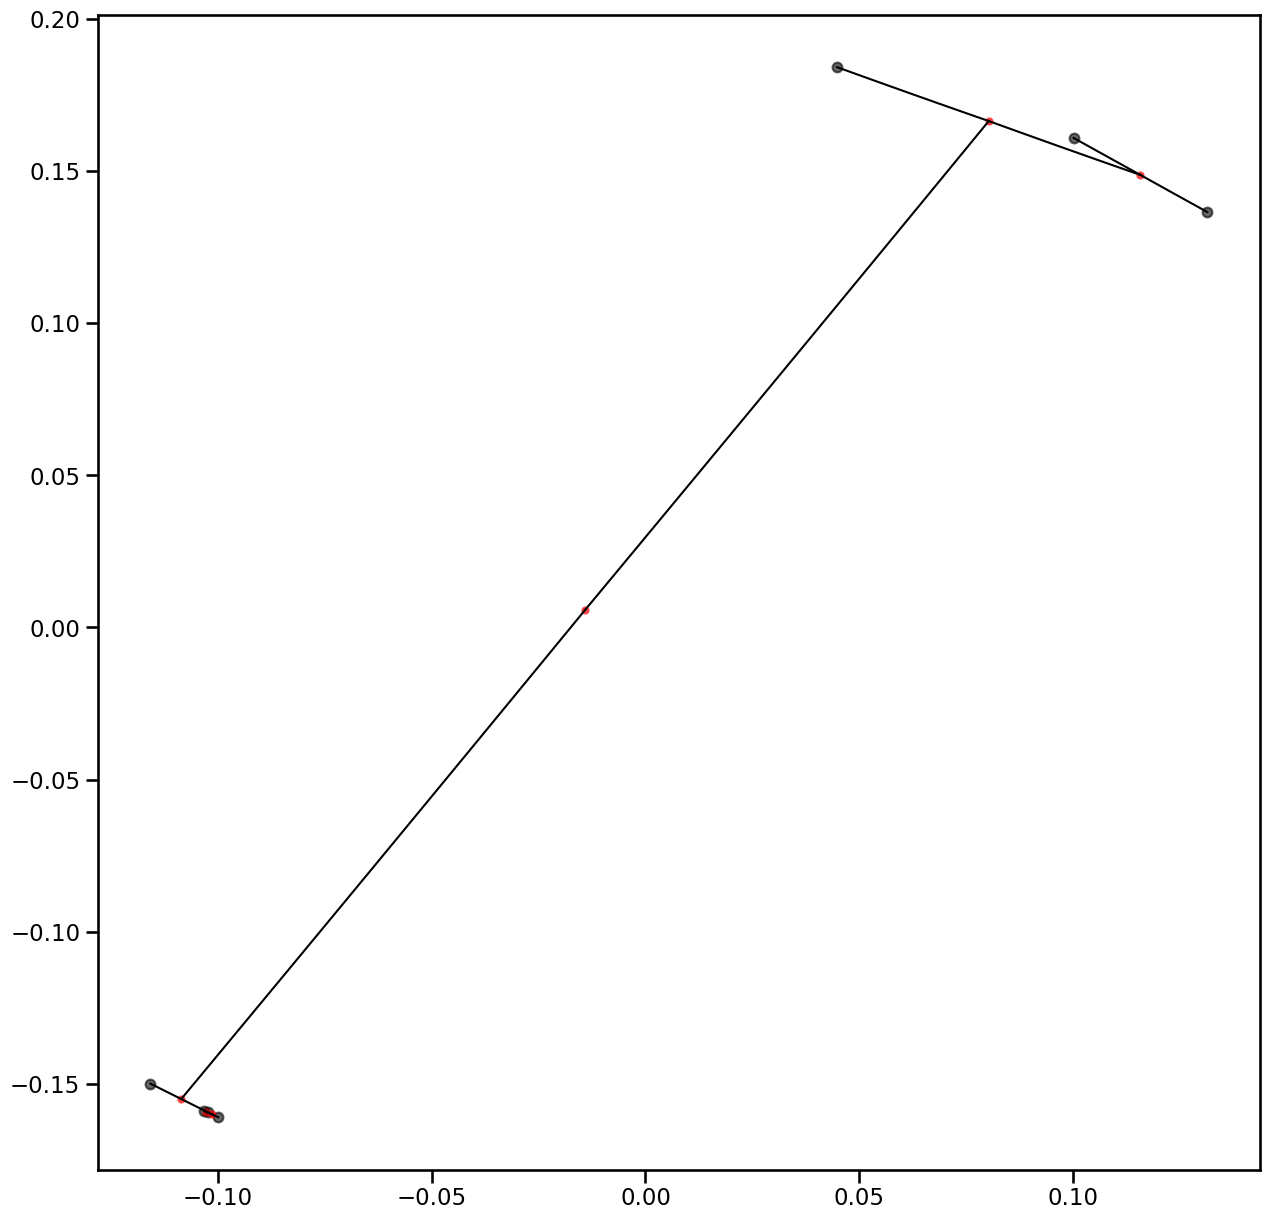

In [23]:
uf = [ father[i] for i in father]
nodes1 = [node(name=str(i),son=[]) for i in range(len(uf))]
n=7;
for i in range(7):
    nodes1[i].subson=[i];
for i,j in enumerate(uf):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(X[i])
    nodes1[i].hyper=torch.tensor(X[i])
root = nodes1[-1];
X = np.array(X)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.scatter(X[:n, 0], X[:n, 1], c='black', s=50, alpha=0.6)
ax.scatter(X[n:, 0], X[n:,1],color ='red',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    print(n1,n2)
    x1 = X[n1];
    x2 = X[n2]
    plot_geodesic(x1,x2,ax)

In [24]:
names = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,names,fathers,xys)
# np.save(save_path+"dataname.npy",names)
# np.save(save_path+"datalink.npy",fathers)
# np.save(save_path+"dataxy.npy",[i.numpy() for i in xys])

In [25]:
np.save(folder_path1+"dataname.npy",names)
np.save(folder_path1+"datalink.npy",fathers)
np.save(folder_path1+"dataxy.npy",[i.numpy() for i in xys])

In [26]:
root.value

tensor([-0.0141,  0.0057], dtype=torch.float64)

In [27]:
nos1 = build_hyper_tree_from_folder(folder_path1,True)
add_meta(nos1[0],meta_list1,[])
show_tree(nos1[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(nos1[0]);

{'0': '#184e77', '4': '#1a759f', '5': '#168aad', '3': '#34a0a4', 'empty': '#fff', '2': '#99d98c', '6': '#76c893', '1': '#99d98c'}
